In [1]:
#author: tayasherstiukova
import pandas as pd


import re, string


train = pd.read_csv("train.csv")
train['emotion'] = train['emotion'].astype('category')

test = pd.read_csv("test.csv")
test['emotion'] = test['emotion'].astype('category')

val = pd.read_csv("val.csv")
val['emotion'] = val['emotion'].astype('category')

def preprocess(text):
    text = text.lower() 
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

wl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess_stop(string):
    return lemmatizer(stopword(preprocess(string)))

def finalpreprocess(string):
    return lemmatizer(preprocess(string))





FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [32]:
#with stopwords
train['clean_text'] = train['sentence'].apply(lambda x: finalpreprocess(x))
test['clean_text'] = test['sentence'].apply(lambda x: finalpreprocess(x))
val['clean_text'] = val['sentence'].apply(lambda x: finalpreprocess(x))

X_train, y_train = train.clean_text, train.emotion
X_test, y_test = test.clean_text, test.emotion
X_val, y_val = val.clean_text, val.emotion

In [12]:
from textblob import TextBlob

# Function to get sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the cleaned text
train['sentiment_polarity'] = train['clean_text'].apply(get_sentiment_polarity)
test['sentiment_polarity'] = test['clean_text'].apply(get_sentiment_polarity)
val['sentiment_polarity'] = val['clean_text'].apply(get_sentiment_polarity)


In [26]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    else:
        return 'negative'

In [27]:
train['sentiment_polarity'] = train['clean_text'].apply(get_sentiment_polarity)
test['sentiment_polarity'] = test['clean_text'].apply(get_sentiment_polarity)
val['sentiment_polarity'] = val['clean_text'].apply(get_sentiment_polarity)

# Add a new column for sentiment category
train['sentiment_category'] = train['sentiment_polarity'].apply(categorize_sentiment)
test['sentiment_category'] = test['sentiment_polarity'].apply(categorize_sentiment)
val['sentiment_category'] = val['sentiment_polarity'].apply(categorize_sentiment)


In [28]:
print("Training Set:")
print(train[['clean_text', 'sentiment_polarity', 'sentiment_category']].head())

print("\nTesting Set:")
print(test[['clean_text', 'sentiment_polarity', 'sentiment_category']].head())

print("\nValidation Set:")
print(val[['clean_text', 'sentiment_polarity', 'sentiment_category']].head())

Training Set:
                                          clean_text  sentiment_polarity  \
0                             i didnt feel humiliate                 0.0   
1  i can go from feel so hopeless to so damned ho...                 0.0   
2       im grab a minute to post i feel greedy wrong                -0.5   
3  i be ever feel nostalgic about the fireplace i...                -0.5   
4                                  i be feel grouchy                 0.0   

  sentiment_category  
0           negative  
1           negative  
2           negative  
3           negative  
4           negative  

Testing Set:
                                          clean_text  sentiment_polarity  \
0  im feel rather rotten so im not very ambitious...            0.094780   
1            im update my blog because i feel shitty            0.000000   
2  i never make her separate from me because i do...            0.000000   
3  i leave with my bouquet of red and yellow tuli...            0.166667 

negative    8390
positive    7610
Name: sentiment_category, dtype: int64


<AxesSubplot:>

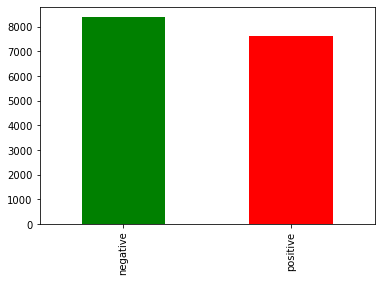

In [29]:
# Count the number of occurrences of each sentiment category
import matplotlib as plt
sentiment_distribution = train['sentiment_category'].value_counts()

# Display the distribution
print(sentiment_distribution)

sentiment_distribution.plot(kind='bar', color=['green', 'red'])




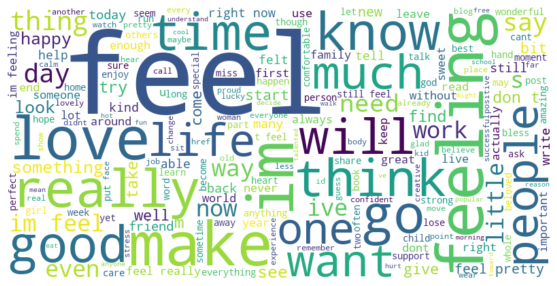

In [30]:
positive_text = ' '.join(train[train['sentiment_category'] == 'positive']['clean_text'])
positive_words = ' '.join([word for word in positive_text.split()])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for positive sentiment
pos_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(positive_words)


plt.figure(figsize=(10, 5))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


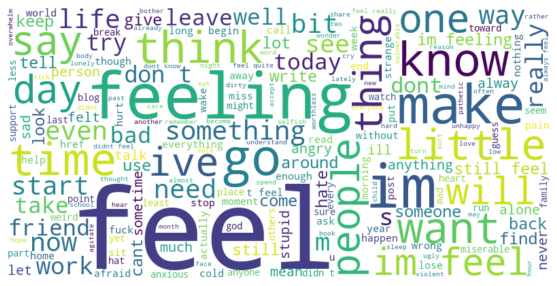

In [31]:
negative_text = ' '.join(train[train['sentiment_category'] == 'negative']['clean_text'])
negative_words = ' '.join([word for word in negative_text.split()])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for positive sentiment
neg_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(negative_words)


plt.figure(figsize=(10, 5))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='emotion'>

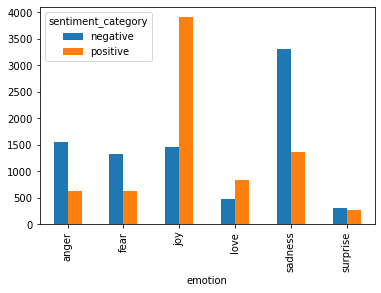

In [34]:
df_tb= train.groupby(['emotion', 'sentiment_category']).size().unstack()

df_tb.plot(kind = 'bar')

In [35]:
#without stopwords
train['clean_text'] = train['sentence'].apply(lambda x: finalpreprocess_stop(x))
test['clean_text'] = test['sentence'].apply(lambda x: finalpreprocess_stop(x))
val['clean_text'] = val['sentence'].apply(lambda x: finalpreprocess_stop(x))

X_train, y_train = train.clean_text, train.emotion
X_test, y_test = test.clean_text, test.emotion
X_val, y_val = val.clean_text, val.emotion

In [36]:
from textblob import TextBlob

# Function to get sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the cleaned text
train['sentiment_polarity'] = train['clean_text'].apply(get_sentiment_polarity)
test['sentiment_polarity'] = test['clean_text'].apply(get_sentiment_polarity)
val['sentiment_polarity'] = val['clean_text'].apply(get_sentiment_polarity)

In [37]:
train['sentiment_polarity'] = train['clean_text'].apply(get_sentiment_polarity)
test['sentiment_polarity'] = test['clean_text'].apply(get_sentiment_polarity)
val['sentiment_polarity'] = val['clean_text'].apply(get_sentiment_polarity)

# Add a new column for sentiment category
train['sentiment_category'] = train['sentiment_polarity'].apply(categorize_sentiment)
test['sentiment_category'] = test['sentiment_polarity'].apply(categorize_sentiment)
val['sentiment_category'] = val['sentiment_polarity'].apply(categorize_sentiment)

print("Training Set:")
print(train[['clean_text', 'sentiment_polarity', 'sentiment_category']].head())

print("\nTesting Set:")
print(test[['clean_text', 'sentiment_polarity', 'sentiment_category']].head())

print("\nValidation Set:")
print(val[['clean_text', 'sentiment_polarity', 'sentiment_category']].head())


Training Set:
                                          clean_text  sentiment_polarity  \
0                               didnt feel humiliate                 0.0   
1  go feeling hopeless damn hopeful around someon...                 0.0   
2              im grab minute post feel greedy wrong                -0.5   
3  ever feel nostalgic fireplace know still property                -0.5   
4                                       feel grouchy                 0.0   

  sentiment_category  
0           negative  
1           negative  
2           negative  
3           negative  
4           negative  

Testing Set:
                                          clean_text  sentiment_polarity  \
0           im feel rather rotten im ambitious right            0.267857   
1                         im update blog feel shitty            0.000000   
2    never make separate ever want feel like ashamed            0.000000   
3  leave bouquet red yellow tulip arm feeling sli...           -0.055556 

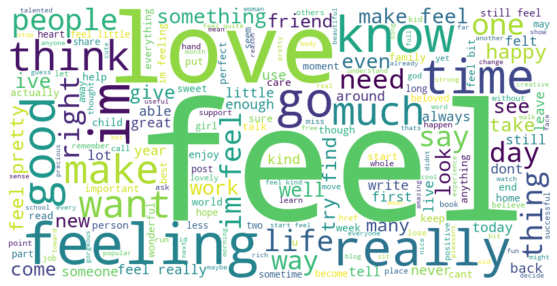

In [38]:
positive_text = ' '.join(train[train['sentiment_category'] == 'positive']['clean_text'])
positive_words = ' '.join([word for word in positive_text.split()])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for positive sentiment
pos_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(positive_words)


plt.figure(figsize=(10, 5))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

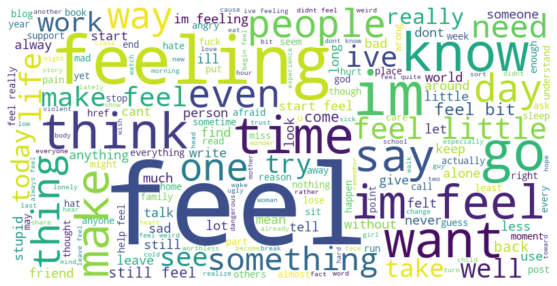

In [39]:
negative_text = ' '.join(train[train['sentiment_category'] == 'negative']['clean_text'])
negative_words = ' '.join([word for word in negative_text.split()])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for positive sentiment
neg_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(negative_words)


plt.figure(figsize=(10, 5))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='emotion'>

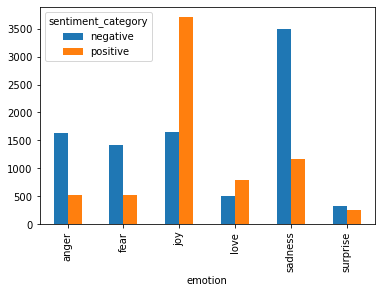

In [40]:
df_tb= train.groupby(['emotion', 'sentiment_category']).size().unstack()

df_tb.plot(kind = 'bar')